In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium as fo
import plotly as ply
import plotly.graph_objects as go
import matplotlib

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib

In [ ]:
colors_pr = [#'#3cb44b',green for land use
    'green',
    'orange',
    '#6a4a3a',
    'grey'
          ]

primary_cm = ListedColormap(colors_pr, name='my_colormap')

In [3]:
p_s = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='stick').iloc[:, :20]
p_2030nl = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2030_nl').iloc[:, :20]
p_2030l = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2030_l').iloc[:, :20]
p_2040nl = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2040_nl').iloc[:, :20]
p_2040l = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2040_l').iloc[:, :20]

In [4]:
all_p=[p_s, p_2030nl, p_2030l, p_2040nl, p_2040l]

In [ ]:
def ccs(df):
    all_p = df['technology'].unique()
    all_p_ff = df[(df['technology'].str.contains("coal")) |(df['technology'].str.contains("gas")) |
                 (df['technology'].str.contains("refined")) 
                 ]
    all_p_ff['type'] = 'Fossil-CCS'
    all_p_cement = df[df['technology'].str.contains("cement")
                 ]
    all_p_cement['type'] = 'Others'
    all_p_bio = df[(df['technology'].str.contains("biomass")) |(df['technology'].str.contains("biofuels")) |
                 (df['technology'].str.contains("paper"))  |(df['technology'].str.contains("ethanol"))
                 ]
    all_p_bio['type'] = 'BECCS'
    all_p_dac = df[df['technology'].str.contains("DAC")
                 ]
    all_p_dac['type'] = 'Direct Air Capture'
    all_df_pp = pd.concat([all_p_ff, all_p_cement, all_p_bio, all_p_dac])

    all_df_pp2 = all_df_pp[['scenario', 'type', 'i2025', 'i2030', 'i2035', 'i2040', 'i2045', 'i2050']]

    # print(all_df_pp2)
    sum_by_type = all_df_pp2.groupby('type').sum()
    dfsss=sum_by_type.transpose()
    return(dfsss)

In [8]:
np_s=ccs(p_s)
np_2030nl = ccs(p_2030nl)
np_2030l = ccs(p_2030l)
np_2040nl = ccs(p_2040nl)
np_2040l = ccs(p_2040l)

C:\Users\Huilin\AppData\Local\Temp\ipykernel_47924\2177867129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_p_ff['type'] = 'Fossil-CCS'
C:\Users\Huilin\AppData\Local\Temp\ipykernel_47924\2177867129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_p_cement['type'] = 'Others'
C:\Users\Huilin\AppData\Local\Temp\ipykernel_47924\2177867129.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [9]:
years = [ '2025', '2030', '2035','2040', '2045', '2050']
np_s.index = years
np_2030nl.index = years
np_2030l.index = years
np_2040nl.index = years
np_2040l.index = years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


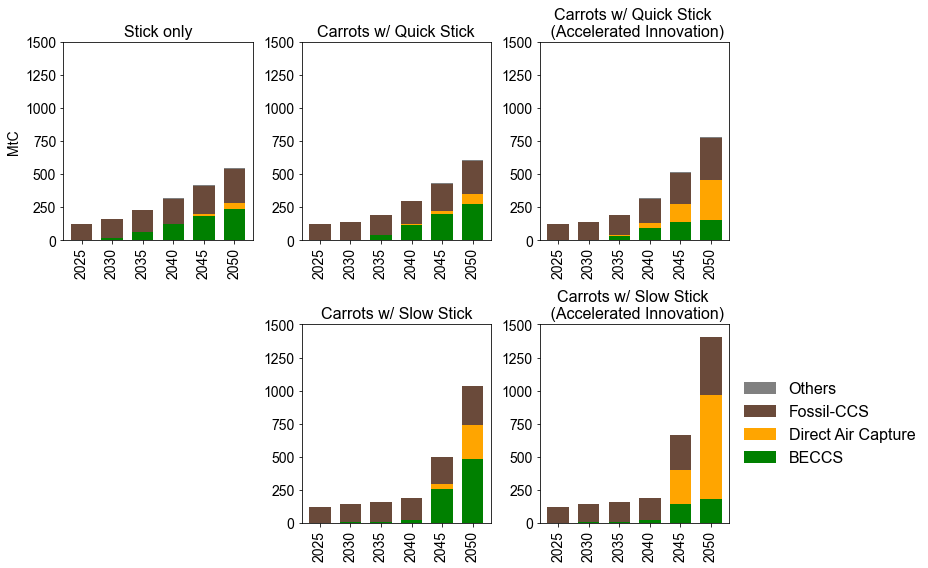

In [ ]:


mpl.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(2, 3, figsize=(13, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})

# plt.suptitle("CO2 captured by technology 2025~2050, 80%", fontsize=18)


axs[1, 0].axis('off')

np_s.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=primary_cm, width=0.7)
np_2030nl.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=primary_cm, width=0.7)
np_2030l.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=primary_cm, width=0.7)
np_2040nl.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=primary_cm, width=0.7)
np_2040l.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=primary_cm, width=0.7)

for ax in axs.flat:
    ax.legend().remove()
    ax.set_ylim(0, 1500)
    ax.tick_params(axis='both', which='major', labelsize=14)


axs[0, 0].set_title('Stick only', fontsize=16)
axs[0, 0].set_ylabel('MtC', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

# Add a global legend with reversed order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)


plt.tight_layout()
plt.show()
